## Opening the file

In [2]:
import pandas as pd
file = "C:\\Users\\sowky\\Downloads\\netflix_titles.csv"
df = pd.read_csv(file)#reads the file
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Getting stopwords

In [3]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{"that'll", 'just', 'hers', 'because', 'few', 'we', 'itself', 'all', "wasn't", "shan't", 'your', 'myself', 'too', 'isn', 'for', 'on', 'when', 'haven', "hadn't", 'hadn', 'more', 'other', 'needn', 'o', 'during', 'any', 'won', 'out', "shouldn't", 'before', 'a', 'd', 'do', 'did', 'how', 'he', 'weren', "weren't", 'themselves', 'me', 'it', 'against', 'yourself', "you'd", 'will', 'm', 'through', "wouldn't", "mustn't", 'have', 'off', 'after', 'll', 'having', "mightn't", "you'll", 'an', 'her', 'mustn', 'very', "didn't", 'mightn', 've', 'each', 'are', "couldn't", 'which', 'aren', 'hasn', 'was', 'were', 'only', 'himself', "hasn't", 'him', 'am', "should've", 'these', 'about', "doesn't", 'yours', 'there', 'under', "needn't", 'between', 'herself', 'into', 'be', 'them', 're', 'over', 'own', "it's", 'if', 'y', "haven't", 'i', "don't", 'while', "you've", 'but', 'nor', 'those', 'being', 'or', 'is', 'didn', 'such', 'with', 'again', "you're", 'they', 'the', 'wasn', 'wouldn', 'most', 's', 'shouldn', 'who',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing pipeline

In [18]:
import regex as re

def tokenize(description):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', description)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]


In [22]:
def prepare(description, pipeline):
    tokens = description
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
# Getting new column called "tokens"
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)


## Counting tokens

In [23]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq>=1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq',ascending =False)
freq_df.head(10)

,freq
token,
life,786
young,728
new,699
family,632
world,545
man,519
love,498
two,495
woman,482


## Drawing the word cloud

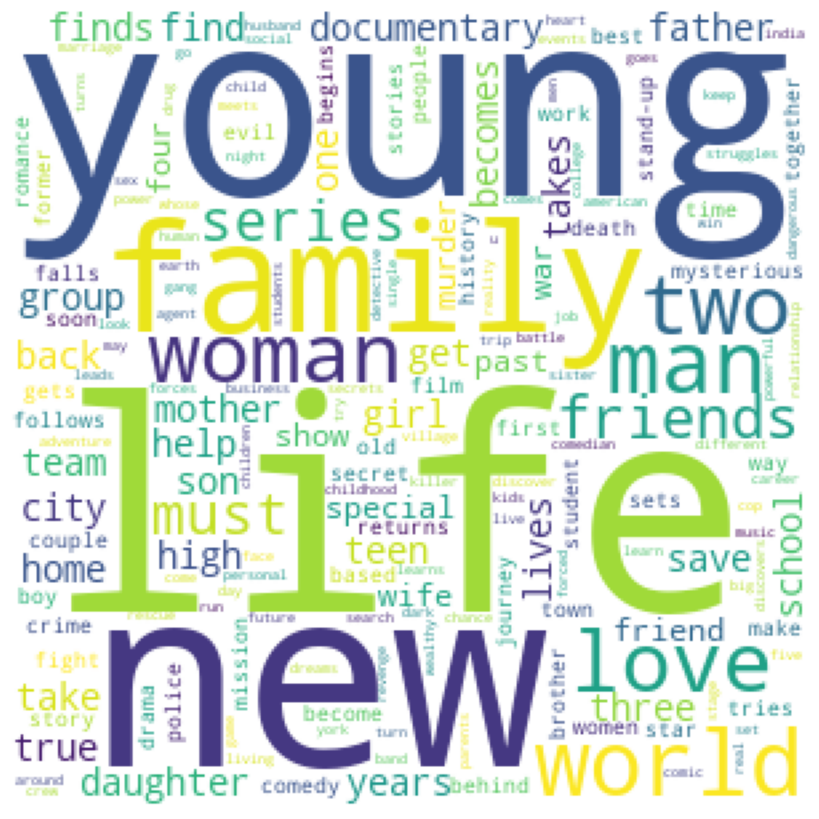

In [25]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
    

## Getting TFIDF and compare

In [26]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
   # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

## TFIDF = TF * IDF

In [27]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
life,786,1987.911600
young,728,1889.707546
new,699,1865.344024
family,632,1733.168738
world,545,1577.004680


## Drawing the word cloud

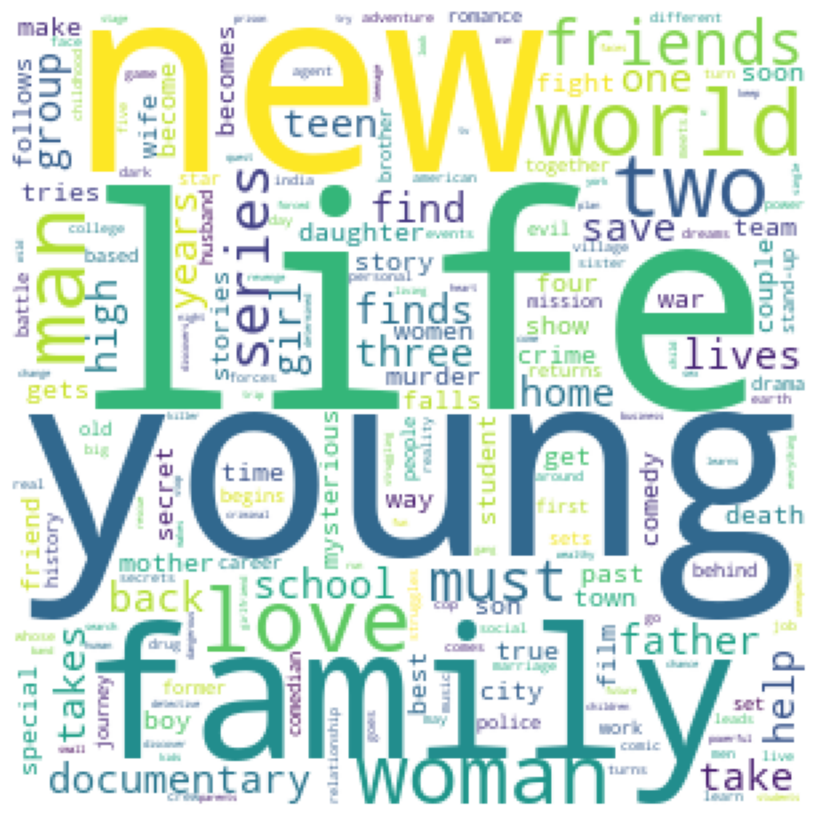

In [28]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Function to count the keywords

In [29]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## Function to group by year

In [30]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


## Getting heatmap

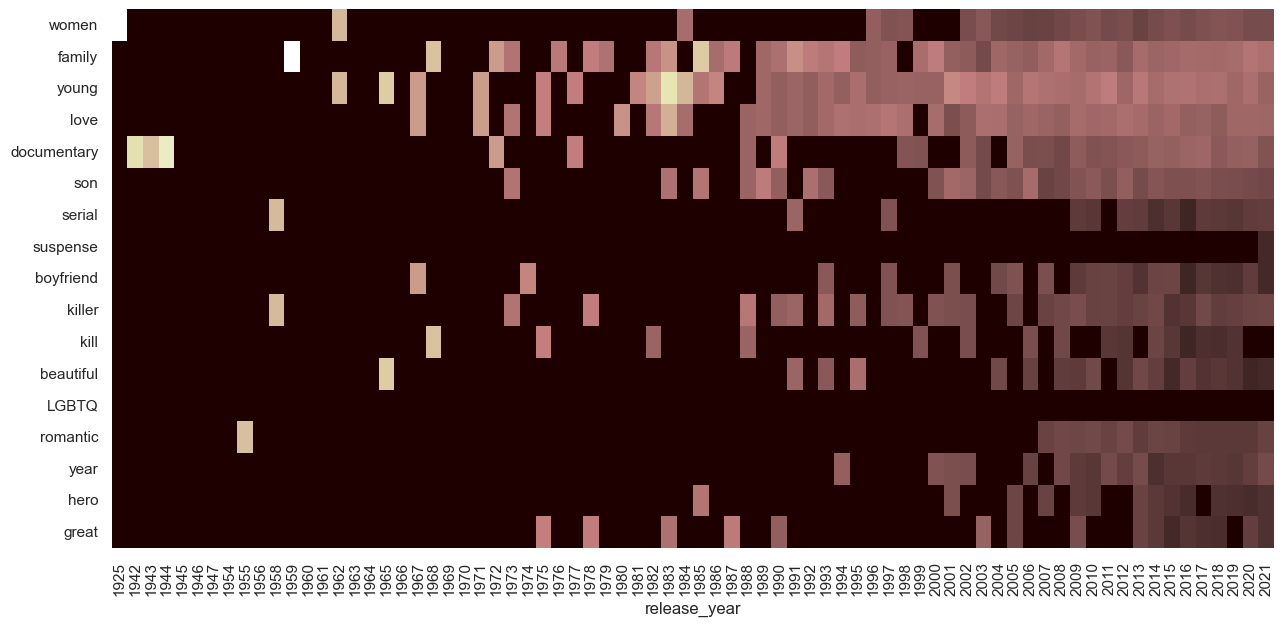

In [45]:
import seaborn as sns
keywords = ['women','family', 'young','love','documentary', 
            'son', 'serial', 'suspense', 'boyfriend', 'killer','kill',
            'beautiful', 'LGBTQ', 'romantic','year', 'hero','great']  
freq_df = count_keywords_by(df, by='release_year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('release_year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="pink")
sns.set(font_scale=1)
